# Numpy and plotting 

_Data Structures and Algorithms_

_Imperial College Business School_


---
This notebook will cover the following Python topics: _Numpy and Matplotlib_.


This tutorial will introduce you to scientific computing in Python using the versatile `numpy` and `matplotlib` modules. You'll also learn how to present data in plots and to apply some basic data analysis tools. Libraries such as these provide many more tools than we're able to cover here - essentially, for most things you can do in specialized languages such as R or MATLAB, you can also find a Python implementation. 

The workshop consists of the following parts:
1. Numpy overview
2. Numpy exercises
3. Introduction to plotting with matplotlib


## Submitting your work

After you're done with the exercises below, you can submit the assignment to OK _directly from this Notebook_. The submission instructions are in the end of the notebook.

First, let's connect to OK. To do so, run the code cell below. It may prompt you to log in. If it does, follow the instructions.

In [ ]:
# Don't change this cell; just run it. 
# The result will give you directions on how to log in to the OK submission system.
# Once you're logged in, OK should remember it for the duration of the session.
import zipimport
import os
nb_path = os.path.join('client', 'api', 'notebook')
ok_bundle =  zipimport.zipimporter('./ok').load_module('client')
ok_nb = zipimport.zipimporter('./ok').load_module(nb_path)
ok = ok_nb.Notebook('ses07.ok')
_ = ok.auth(inline=True)

The below cell provides an alternative way to log in to OK if the above way fails on your computer for some reason. If the login worked, you can skip to the next section.

In [ ]:
# If your login works with the above cell, no need to run this
# If the above cell does not work, this is a backup way of loading up OK
# Don't change this cell; just run it. 
!pip install -U okpy
from client.api.notebook import Notebook
ok = Notebook('ses07.ok')
_ = ok.auth(inline=True)

If the OK problem still persists, try the following steps: 
1. Go to the command line and navigate to the folder where you have this Notebook.
2. Run the command `python ok` and log in the standard way
3. Try running the first cell above again.

# Scientific computing with numpy 

In analytics and scientific computing, we often deal with large numerical datasets. The Python community has developed a set of powerful and well-maintained libraries that build on and extend the standard functionalities and data structures of Python to make working on such problems faster and more convenient. Today we'll look at the `numpy` library. Later in themodule, we'll learn to use pandas, which is a versatile data analysis library building on numpy's features. These are widely used tools for doing analytics using Python.

These are vast topics, so by necessity these tutorials will only provide a brief overview to them. We'll suggest additional readings in the review section.

## Why numpy?

Consider the following matrix:
$$
M = \left[
 \begin{matrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 9
 \end{matrix}
\right]
$$

Based on what we've learned, we could implement it in Python as a list of lists:
```python
>>> m = [[1, 2, 3],
...      [4, 5, 6],
...      [7, 8, 9]]
>>> m
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
```

Suppose we want to add 2 to every element. Ideally, we would want to do something like `m + 2`. However, if you try you will get this:
```python
>>> m + 2
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-3-d5811c0a075a> in <module>()
----> 1 m + 2

TypeError: can only concatenate list (not "int") to list
```

You can do it but it becomes more involved, not very readable and not very general either.
We could do it using nested loops or a by a list comprehension like the one below:

```python
>>> for j in range(len(m)):
...     for i in range(len(m[j])):
...         m[i][j] = m[i][j] + 2
>>> m
[[3, 4, 5], [6, 7, 8], [9, 10, 11]]
```

```python
>>> [[i + 2 for i in j] for j in m]
[[3, 4, 5], [6, 7, 8], [9, 10, 11]]
```

This is where Numpy comes in. Numpy is a library providing a powerful representation for fast manipulation of multi dimensional arrays. It is particularly useful for scientific computing and other tasks where we constantly deal with numerical data.

In brief, numpy allows us to do manipulations in a simpler way than lists, and  due to its efficient implementation, it is also much faster than using lists. 

So far in the module, we've been learning about looping through lists, implementing searching and sorting algorithms from scratch, calculating the number of basic steps our algorithms take, and generally _doing things the hard way_, avoiding convenient shortcuts. This approach is very useful both for learning the core methods of programming and for developing our problem-solving skills. Now in this tutorial and later with the pandas library, we're starting to learn the tools we'll use in practice to quickly and conveniently solve real problems with data. We will discover and build on the many useful methods that the Python community has developed for dealing with data, and generally start doing things in easier ways. 

## Numpy overview

Let's start by loading the numpy library to make its features available to us. The convention is to import is as follows:

In [244]:
import numpy as np

We've made numpy available for our use, and given it the name `np`. This means that everytime we want to use a function in numpy we access it as `np.function`.

We can create a numpy _array_ as follows:

In [245]:
a = np.array([1, 2, 3])
print(type(a))
print(a)

<class 'numpy.ndarray'>
[1 2 3]


An array in numpy resembles a Python list in that it's an ordered sequence of elements. We can access elements just like before, however, we cannot have different kinds of data in the same array:

In [246]:
x = a[1]
a[2] = 2
print(a)
a[1] = 'Hello' # will give an error

[1 2 2]


ValueError: invalid literal for int() with base 10: 'Hello'

We could still create an array with strings alone, though:

In [247]:
string_array = np.array(['a', 'b', 'c'])

Numpy's speed comes at the cost of some flexibility here. With Python lists, we could have different data elements within a list, but data in numpy arrays must be of the same type. 

We sometimes want to move from a list to a numpy array for calculations. We can do it with the syntax `np.array(L)` where L is our list, and similarly go back.

In [248]:
L = [1, 5, 7, 9]
s = np.array(L)

new_list = list(s)

### Let's add a dimension

Suppose we want to create a matrix; ie a two-dimensional array. This is similar creating nested lists.

In [249]:
m = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

In [250]:
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

We can check the number of dimensions of an array by its `ndim` attribute:

In [251]:
print(a.ndim)
m.ndim

1


2

The shape attribute gives the size of each dimension as a tuple. A one-dimensional array will have just one element in the tuple, a two-dimensional one will have two.

In [252]:
print(a.shape)
m.shape

(3,)


(3, 3)

Try out the following commands to get a hang of how they work.

In [254]:
b = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

In [255]:
b.ndim

2

In [256]:
b.shape

(4, 3)

In [257]:
len(b) # size of the first dimension

4

In practice we rarely define arrays by hand. There are several convenient functions to create arrays in numpy. Here's the equivalent of `range` in `numpy`.

In [258]:
np.arange(10) # creates array with values from 0 to input 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We can also create an array with equally spaced numbers:

In [259]:
np.linspace(2, 20, 10)

array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.])

You've seen some matrices in you maths classes. Here's one called the identity matrix which has ones on the diagonal and zeros otherwise. It is useful for many calculations. Similarly, there are functions for creating arrays filled with zeroes or ones.

In [260]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [261]:
np.zeros((2, 2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [262]:
np.ones((3, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

Numpy has its own of generating random numbers. Here `rand` draws uniform random numbers from $[0,1]$ in the shape of a two times three array.

In [263]:
np.random.rand(2, 3)

array([[ 0.73105886,  0.41905528,  0.36186252],
       [ 0.28957882,  0.30487136,  0.73354696]])

### Indexing and slicing

Slicing arrays shares the syntax with lists: (`array[begin:end:step]`):

In [264]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [265]:
a[:5] # all elements up to the fifth

array([1, 2, 3, 4, 5])

In [266]:
a[-1] # Last element

10

In [267]:
a[5:]

array([ 6,  7,  8,  9, 10])

In [268]:
a[2:-2]

array([3, 4, 5, 6, 7, 8])

In [269]:
a[::2]

array([1, 3, 5, 7, 9])

You can also have a negative step in which case the element are read from the end:

In [270]:
a[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

To index a 2-D array we need two coordinates.

In [271]:
a=np.random.rand(3, 3)

print(a)

a[1,2]

[[ 0.296965    0.55089289  0.75497907]
 [ 0.05800831  0.10953703  0.97953937]
 [ 0.70165439  0.43410207  0.93603729]]


0.97953937046286743

However, we can also use the lists of lists syntax:

In [272]:
a[1][2]

0.97953937046286743

### Operations on numpy arrays

We now know how to create arrays in different ways. Let's continue by doing some math on numpy arrays. 

Compare how the operations work to what we've been doing with lists.

In [273]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

Most operations in numpy are by default **element-wise**, i.e. they are applied to each element of the array. This is much more convenient than looping through a list.

In [274]:
a + 2

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [275]:
a * 3

array([[ 3,  6,  9],
       [12, 15, 18],
       [21, 24, 27]])

In [276]:
a**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]], dtype=int32)

In [277]:
a/2

array([[ 0.5,  1. ,  1.5],
       [ 2. ,  2.5,  3. ],
       [ 3.5,  4. ,  4.5]])

In [278]:
a+a # same as 2*a

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [279]:
a*a # same as a**2

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

Numpy comes in with some more complex functions built-in:

In [280]:
np.cos(a) # cosine

array([[ 0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029],
       [ 0.75390225, -0.14550003, -0.91113026]])

In [281]:
np.exp(a) # exponential

array([[  2.71828183e+00,   7.38905610e+00,   2.00855369e+01],
       [  5.45981500e+01,   1.48413159e+02,   4.03428793e+02],
       [  1.09663316e+03,   2.98095799e+03,   8.10308393e+03]])

In [282]:
np.exp([1, 0]) # list input is possible

array([ 2.71828183,  1.        ])

### Built-in aggregation

Once we have data in a numpy array, we can calculate statistics. Much easier than looping through (lists of) lists!

Let's start with the sum of elements of an array, either directly or by numpy's `array.sum` function:

In [283]:
b = np.array([1, 3, 5])
print(sum(b))
a = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(np.sum(a, axis=0)) # can sum along different dimensions using axis option
print(np.sum(a, axis=1))

9
[ 9 12]
[ 3  7 11]


Similarly, we can get the maximum and the minimum:

In [284]:
print([max(b) , min(b)])
print(np.max(a, axis=0)) # can max/min along different dimensions using axis option
print(np.min(a, axis=1))
a.max(0) # we can also get max directly from array along axis 0

[5, 1]
[5 6]
[1 3 5]


array([5, 6])

Numpy has a large number of these functions available, some of which are included in the following table. Most of these functions come with "NaN-safe" counterpart. A NaN-safe function can deal with missing values (which are called NaN values for "Not a Number") bye ignoring them and not returning an error.



| Function Name     | NaN-safe Version|Description|
|-------------------------------|-------------------|-------|
|np.sum	|np.nansum	|Compute sum of elements|
|np.prod|	np.nanprod	|Compute product of elements|
|np.mean|	np.nanmean	|Compute mean of elements|
|np.std	|np.nanstd	|Compute standard deviation|
|np.var|	np.nanvar	|Compute variance|
|np.min|	np.nanmin	|Find minimum value|
|np.max	|np.nanmax	|Find maximum value|
|np.argmin|	np.nanargmin|	Find index of minimum value|
|np.argmax|	np.nanargmax|	Find index of maximum value|
|np.median	|np.nanmedian|	Compute median of elements|
|np.percentile|	np.nanpercentile|	Compute rank-based statistics of elements|
|np.any	|N/A	|Evaluate whether any elements are true|
|np.all	|N/A	|Evaluate whether all elements are true|

# Numpy exercises



Now that we have seen the tools, let's see how we can apply them on financial data. 

Let's first import some data. We will import the file `stock_prices_2015.csv`. This file contains daily stock price data for Google, Amazon, Apple and Facebook for the year 2015. The format of the table is like this:


| GOOG    |         AMZN               |AAPL|FB|
|---------------|-----------------|------------------|-------|
| 524.812404   | 308.519989        |105.69862| 78.449997|
| 513.872306 | 302.190002        |102.72092|77.190002|

We'll first read the data into a numpy array. Because we can't have strings in the same array as numbers, we'll get rid of the dates in the file for the purposes of this exercise.

> **Advanced**. Normally when reading data like this, we'd do it with the pandas library which allows us to more conveniently keep different kinds of data conveniently together. After loading it to pandas, we could then use the data for numpy operations. We'll upgrade to this approach later on. Today, we'll load the data with numpy.

In [73]:
# We'll read the data from the csv file using the numpy method genfromtxt
all_stock_prices = np.genfromtxt("stock_prices_2015.csv", delimiter=",", skip_header=1)
# Remove date column
all_stock_prices = all_stock_prices[:, 1:]


print(all_stock_prices[0,:]) # first stock prices of the year for the four companies

goog = all_stock_prices[:,0] # array with just Google prices
print(goog[0:10]) # print ten first prices

[ 524.812404  308.519989  105.69862    78.449997]
[ 524.812404  513.872306  501.962262  501.102268  502.682285  496.172244
  492.552239  496.182251  500.872267  501.792271]


Now we have a numpy array with the data. The companies are ordered as in the csv file: the first column (index zero) is Google, followed by Amazon, Apple, and Facebook.

### Question 1: counts

Calculate the number of price records we have for each company. Why is the number different from 365? 

**Hint**: You can use the `array.shape` command from above to get the dimensions of an array.

In [18]:
# Change the cell so that it computes how many price observations we have for each company

# your code here
number_of_entries = ...

# We've put this line in this cell so that it will print
# the value you've given to number_of_entries when you
# run it. You don't need to change this.
number_of_entries

Ellipsis

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q1')

*If you get an error about question q1 missing, make sure the folder in which you are working on this notebook contains all files included in the session zip file, including the /tests folder.*

### Question 2: means

What was the average stock price of Amazon during the year, rounded to an integer value?

In [17]:
# Change the cell so that it computes the average price for Amazon

# Your code here
average_for_AMZN = ...


# We've put this line in this cell so that it will print
# the value you've given to average_for_AMZN when you
# run it.  You don't need to change this.
average_for_AMZN

Ellipsis

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q2')

### Question 3: returns

When comparing the performance of stock prices, analysts often look at their _returns_ over a period of time. The return is defined as the percentage change, so the return between periods $t-1$ and $t$ for stock price $p$ would be

$$
x_t = \frac{p_t - p_{t-1}}{p_{t-1}}.
$$

For example, suppose that Apple's stock price on 1 August was \$150, and on 2 August \$157. The daily return was then

$$
x = \frac{157 - 150}{150} \approx 0.047 = 4.7\%.
$$



Let's compute the daily returns for Facebook and save it in a new Numpy array. 

We are going to use this array in the next question as well.

In [ ]:
# Change the cell so that it computes a Numpy array containing the daily returns for FB
# The first day's return should be zero as there is no previous value.

# Initialize an empty array for returns
fb_returns= np.zeros(number_of_entries)

# Create a loop that calculates the daily returns
# Your code here
for i in range(1, number_of_entries):
    fb_returns[i] = ...


# We've put this line in this cell so that it will print
# fb_returns when you run it.  You don't need to change this.
fb_returns[0:10]

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q3')

**Exercise.** (No test for this exercise.) Next calculate the returns for all the four companies. Loop through to create an array of returns corresponding to the stock prices.

In [15]:
# Change the cell so that it computes a Numpy array containing the daily returns for each company
# The first day's return should be zero as there is no previous value.

# Initialize an empty array for returns
all_returns= np.zeros(all_stock_prices.shape)

# Create a nested loop that calculates the daily returns
# Your code here

# We've put this line in this cell so that it will print
# some elements of all_returns when you run the code. You don't need to change this.
all_returns[0:3, 3]

array([ 0.,  0.,  0.])

### Question 4
Compute the highest daily returns for FB as a decimal number (where e.g. 0.10 indicates 10% return).

In [14]:
# Change the cell so that it computes the highest daily returns for FB


# Your code here
highest_FB_daily_returns = ...


# We've put this line in this cell so that it will print
# the value you've given to highest_FB_daily_returns when you
# run it.  You don't need to change this.
highest_FB_daily_returns 

Ellipsis

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q4')

### Question 5
Lastly, let's calculate the volatility (standard deviation) for FB. Hint: you can use one of the aggregations that Numpy provides. 

In [19]:
# Change the cell so that it computes the volatility of FB into fb_vol. Use the fb_returns array we calculated earlier.

# Your code here
fb_vol = ...

# We've put this line in this cell so that it will print
# the value you've given to fb_vol when you
# run it.  You don't need to change this.
fb_vol

Ellipsis

In [ ]:
# Test cell; please do not change!
_ = ok.grade('q5')

# Plotting

Now let's see how we can plot data.

We'll start by importing the most commonly used Python plotting library, `matplotlib`:

In [63]:
import matplotlib.pyplot as plt

When we are in the Jupyter notebook, we need to use the following command to make sure the Notebook interface is able to display plots. If using matplotlib elsewhere, we don't need this command.

In [64]:
%matplotlib inline

Now let's create a first plot. We've talked about different cases of complexity in class: $O(\log n)$, $O(n)$, $O(n\log n)$, $O(n^2)$. Let's plot how quickly these functions grow with the input.

In [65]:
x = np.linspace(1, 10, 100)
x_squared = x**2
log_x = np.log(x) # natural logarithm
x_log_x = x*np.log(x)

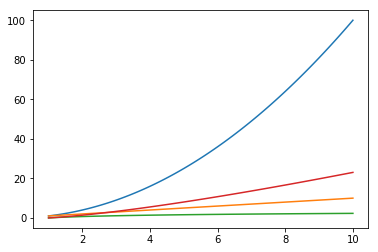

In [66]:
plt.plot(x, x_squared)
plt.plot(x, x)
plt.plot(x, log_x)
plt.plot(x, x_log_x)

Let's make it a bit more fancy by adding a legend. One way to do this is to label the plots when creating them.

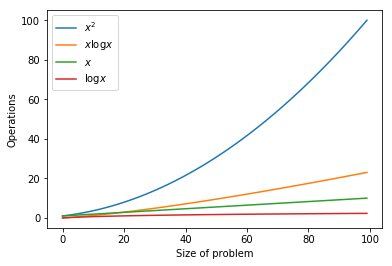

In [67]:
# Give each curve a variable names and a label which we can refer to later
x_squared_plot, = plt.plot(x_squared, label='$x^2$') # The dollar signs make math appear fancy through LaTeX
x_log_x_plot, = plt.plot(x_log_x, label='$x\log x$')
x_plot, = plt.plot(x, label='$x$')
log_x_plot, = plt.plot(log_x, label='$\log x$')

# Give the plot variables as "handles" so matplotlib uses labels as legend entries
plt.legend(handles=[x_squared_plot, x_log_x_plot, x_plot, log_x_plot]) 

# Labels on axis
plt.xlabel("Size of problem")
plt.ylabel("Operations")

Another common type of a plot is a scatterplot. Here we plot some random numbers:

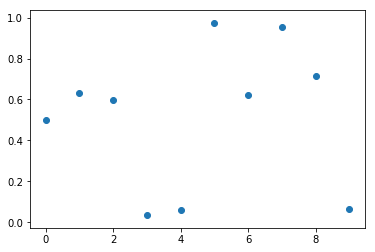

In [68]:
x = np.arange(10)
y = np.random.rand(10)
plt.scatter(x, y) # Scatter plot

Now let's plot some of our  stock price data. Below is a plot of Google's price in red. Try changing the colours. 
Here are some colours we can use through letter notation.

b : blue; g : green; r : red; c : cyan; m : magenta; y : yellow; k : black; w : white.

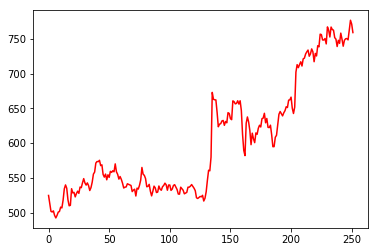

In [69]:
plt.plot(all_stock_prices[:,0], 'r') # plot the stock price for GOOG specifying color 'r'

Next, let's plot the prices of GOOG and AMZN together, in order to compare them.

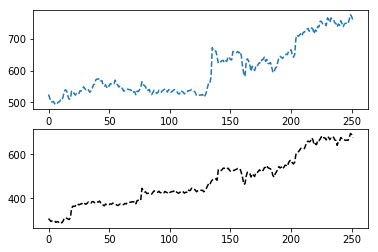

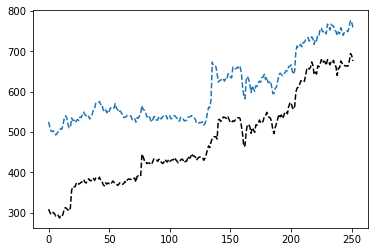

In [74]:
plt.figure(1) # First figure: plot separately as subplots
plt.subplot(2, 1, 1) # Notation: (rows, columns, position)
plt.plot(all_stock_prices[:,0], '--') # specify dashed line

plt.subplot(2, 1, 2) # Notation: (rows, columns, position)
plt.plot(all_stock_prices[:,1], 'k--') # specify black dashed line

plt.figure(2) # Second figure: plot together
plt.plot(all_stock_prices[:,0], '--') # specify dashed line
plt.plot(all_stock_prices[:,1], 'k--') # specify black dashed line

We can also have them in the same plot. Let's plot the _normalized_ prices for all the companies together.

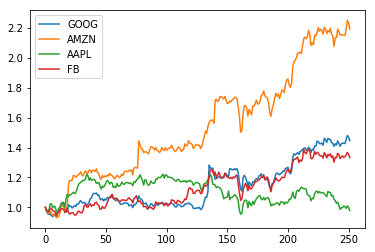

In [75]:
# If we don't specify colors, the color scheme is default which looks pretty nice
plt.plot(all_stock_prices[:,0]/all_stock_prices[0,0])
plt.plot(all_stock_prices[:,1]/all_stock_prices[0,1])
plt.plot(all_stock_prices[:,2]/all_stock_prices[0,2])
plt.plot(all_stock_prices[:,3]/all_stock_prices[0,3])
plt.legend(['GOOG', 'AMZN', 'AAPL', 'FB']) # can also specify legend directly

Let's look at returns again. How are they distributed?

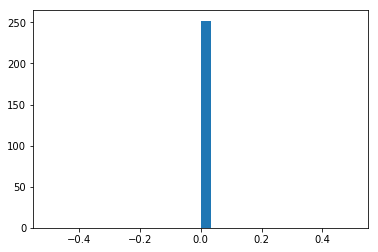

In [76]:
# Facebook returns histogram
fb_hist = plt.hist(fb_returns, 30) # 30 bins

**Exercise.** (No test for this exercise). Create the same histogram plot for the other stocks.

**Exercise.** (No test for this exercise). Create a scatter plot of Google vs. Apple stock returns.


## All done!

### Important!

Run this final cell to submit your work. Alternatively, you can submit from the command line with `python ok --submit` as before.

In [ ]:
_ = ok.submit()

## Review

Numpy is a fast and convenient way of dealing with large quantities of data in Python.

Here's an example of its speed compared to standard lists. Let's calculate the squared value of integers up to 10000. The difference in speed is orders of magnitude between the two approaches (milliseconds vs microseconds).

```ipython
In [1]: %timeit l = [i**2 for i in range(10000)]
100 loops, best of 3: 4.43 ms per loop

In [2]: import numpy as np
In [3]: %timeit l = np.arange(10000)**2
100000 loops, best of 3: 14.4 µs per loop

```

This tutorial has been a quick overview of numpy and matplotlib. Next time we'll continue to pandas which provides more convenient tools to deal with data from different sources. 

There are many great resources online for learning more about matplotlib and numpy. Here are a few of them:
- The SciPy lecture notes, which this tutorial is partly based on: http://www.scipy-lectures.org/
- Matplotlib tutorials: https://matplotlib.org/users/tutorials.html - see also the examples gallery on the website
- The Python Data Science Handbook https://github.com/jakevdp/PythonDataScienceHandbook
- If you're coming from MATLAB, Numpy for MATLAB users: https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html

## Example: price simulation

When analysing the risk of an investment portfolio, we often want to run simulations on stock prices. 

Facebook's returns above look like they might be normally distributed. Let's assume they are, and simulate how the stock price might change over the next year if future prices behaved similarly. First, we calculate the mean and the standard deviation of the returns.

In [211]:
fb_mean = fb_returns.mean()
fb_std = fb_returns.std()

fb_mean, fb_std

(0.0012748301816149477, 0.016141325683453729)

Next, let's generate random numbers from the normal distribution with these parameters. These are possible random daily returns that could happen if the future returns were similar to past ones.

In [217]:
# Create 100 year-long (252 day) simulations
sampling_period = 252
no_draws = 100

random_draw = np.random.normal(fb_mean, fb_std, (sampling_period, no_draws)) 

random_draw[0:10, 1]

0.0012703785605565358

In [215]:
# Calculate cumulative return of simulation during year
c = np.cumprod(random_draw + 1, axis=0)

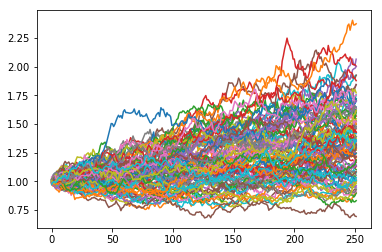

In [216]:
plot_range = range(sampling_period) # Get x axis for graph

# We can create plots with loops
for i in range(c.shape[1]):
    plt.plot(plot_range, c[:,i])

plt.show()

The pattern is upwards as FB went up by a lot during the year. Historical data is not a predictor of future performance, but it may be valuable in assessing the risk of investments. This simulation is naive not only in assuming normally distributed returns but also in that it doesn't take into account factors like autocorrelation (today's return might be related to yesterday's one). Now we simply assume independently distributed returns every day. A more sophisticated time-series analysis would be required for better calibration of the simulation model. Nonetheless, this example shows that using numpy's built-in capabilities, we can start doing useful analysis fairly quickly.